# Problem set 2: Finding the Walras equilibrium in a multi-agent economy

[<img src="https://mybinder.org/badge_logo.svg">](https://mybinder.org/v2/gh/NumEconCopenhagen/exercises-2019/master?urlpath=lab/tree/PS2/problem_set_2.ipynb)

In [7]:
%load_ext autoreload
%autoreload 2

# Tasks

## Drawing random numbers

Replace the missing lines in the code below to get the same output as in the answer.

In [8]:
import numpy as np
np.random.seed(1986)
state = np.random.get_state()
for i in range(3):
    np.random.set_state(state)
    for j in range(2):
        x = np.random.uniform()
        print(f'({i},{j}): x = {x:.3f}')

(0,0): x = 0.569
(0,1): x = 0.077
(1,0): x = 0.569
(1,1): x = 0.077
(2,0): x = 0.569
(2,1): x = 0.077


**Answer:**

In [9]:
import numpy as np
np.random.seed(1986)
state = np.random.get_state()
for i in range(3):
    np.random.set_state(state)
    for j in range(2):
        x = np.random.uniform()
        print(f'({i},{j}): x = {x:.3f}')

(0,0): x = 0.569
(0,1): x = 0.077
(1,0): x = 0.569
(1,1): x = 0.077
(2,0): x = 0.569
(2,1): x = 0.077


## Find the expectated value

Find the expected value and the expected variance

$$ 
\mathbb{E}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} g(x_i
$$
$$ 
\mathbb{VAR}[g(x)] \approx \frac{1}{N}\sum_{i=1}^{N} \left( g(x_i) - \frac{1}{N}\sum_{i=1}^{N} g(x_i) \right)^2
$$

where $ x_i \sim \mathcal{N}(0,\sigma) $ and

$$ 
g(x,\omega)=\begin{cases}
x & \text{if }x\in[-\omega,\omega]\\
-\omega & \text{if }x<-\omega\\
\omega & \text{if }x>\omega
\end{cases} 
$$

In [10]:
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)
xs = np.random.normal(loc=0,scale=sigma,size = N)

def g_func(x,omega=omega):
    if -omega<x<omega:
        return x
    elif x<-omega:
        return -omega
    else:
        return omega
gs = np.array([g_func(x) for x in xs])

In [11]:
print(np.mean(gs))
print(np.var(gs))

-0.0026419419466646686
2.6980407418768872


In [12]:
# Method without function:
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)
xs = np.random.normal(loc=0,scale=sigma,size = N)


gs = [np.max([-omega,np.min([x,omega])]) for x in xs]


print(np.mean(gs))
print(np.var(gs))

-0.0026419419466646686
2.6980407418768872


**Answer:**

In [13]:
# a. parameter choices
sigma = 3.14
omega = 2
N = 10000
np.random.seed(1986)

# b. draw random numbers
x = np.random.normal(loc=0,scale=sigma,size=N)

# c. transformation function
def g(x,omega):
    y = x.copy()
    y[x < -omega] = -omega
    y[x > omega] = omega
    return y

# d. mean and variance
mean = np.mean(g(x,omega))
var = np.var(g(x-mean,omega))
print(f'mean = {mean:.5f}, var = {var:.5f}')

mean = -0.00264, var = 2.69804


## Interactive histogram

**First task:** Consider the code below. Fill in the missing lines so the figure is plotted.

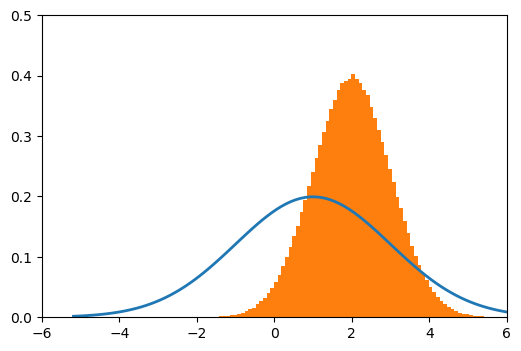

In [44]:
# a. import
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm # normal distribution


# b. plotting figure
def fitting_normal(X,mu_guess,sigma_guess):
    
    # i. normal distribution from guess
    F = norm(loc=mu_guess,scale=sigma_guess)
    
    # ii. x-values
    x_low = F.ppf(0.001) # x value where cdf is 0.001
    x_high = F.ppf(0.999) # x value where cdf is 0.999
    x = np.linspace(x_low,x_high,100)

    # iii. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,F.pdf(x),lw=2)
    ax.hist(X,bins=100,density=True,histtype='stepfilled');
    ax.set_ylim([0,0.5])
    ax.set_xlim([-6,6])

# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. random draws
X = np.random.normal(loc=mu_true,scale=sigma_true,size=10**6)

# e. figure
try:
    fitting_normal(X,mu_guess,sigma_guess)
except:
    print('failed')

**Second task:** Create an interactive version of the figure with sliders for $\mu$ and $\sigma$.

In [45]:
import ipywidgets as widgets

In [46]:
widgets.interact(fitting_normal,
    X=widgets.fixed(X),
    mu_guess= widgets.FloatSlider(description='$\mu$', min=0.1, max=5, step=0.05, value=1),
    sigma_guess = widgets.FloatSlider(description="$\sigma $", min=0.1, max=5, step=0.05, value=1)
);

interactive(children=(FloatSlider(value=1.0, description='$\\mu$', max=5.0, min=0.1, step=0.05), FloatSlider(v…

**Answer:**

In [24]:
# a. import
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm

# b. plotting figure
def fitting_normal(X,mu_guess,sigma_guess):
    
    # i. normal distribution from guess
    F = norm(loc=mu_guess,scale=sigma_guess)
    
    # ii. x-values
    x_low = F.ppf(0.001) # x value where cdf is 0.001
    x_high = F.ppf(0.999) # x value where cdf is 0.999
    x = np.linspace(x_low,x_high,100)

    # iii. figure
    fig = plt.figure(dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(x,F.pdf(x),lw=2)
    ax.hist(X,bins=100,density=True,histtype='stepfilled');
    ax.set_ylim([0,0.5])
    ax.set_xlim([-6,6])

# c. parameters
mu_true = 2
sigma_true = 1
mu_guess = 1
sigma_guess = 2

# d. figure
X = np.random.normal(loc=mu_true,scale=sigma_true,size=10**6)
#fitting_normal(X,mu_guess,sigma_guess)

In [17]:
import ipywidgets as widgets
widgets.interact(fitting_normal,
    X=widgets.fixed(X),
    mu_guess=widgets.FloatSlider(description="$\mu$", min=0.1, max=5, step=0.05, value=1),
    sigma_guess=widgets.FloatSlider(description="$\sigma$", min=0.1, max=5, step=0.05, value=1)
);

interactive(children=(FloatSlider(value=1.0, description='$\\mu$', max=5.0, min=0.1, step=0.05), FloatSlider(v…

## Save and load

Consider the code below and fill in the missing lines so the code can run without any errors.

In [47]:
import pickle

# a. create some data
my_data = {}
my_data['A'] = {'a':1,'b':2}
my_data['B'] = np.array([1,2,3])
my_data['C'] = np.array([1,2,3])

my_np_data = {}
my_np_data['D'] = np.array([1,2,3])
my_np_data['E'] = np.zeros((5,8))
my_np_data['F'] = np.array([1,1,1])


# c. save with pickle
with open(f'data.p', 'wb') as f:
    pickle.dump(my_data, f)
    pass
    
# d. save with numpy
np.savez(f'data.npz', **my_np_data)
    
# a. try
def load_all():
    with open(f'data.p', 'rb') as f:
        data = pickle.load(f)
        A = data['A']
        B = data['B']
        C = data['C']

    with np.load(f'data.npz') as data:
        D = data['D']
        E = data['E']
        F = data['F']        
    
    print('variables loaded without error')
    
try:
    load_all()
except:
    print('failed')

variables loaded without error


**Answer:**

In [13]:
import pickle

# a. create some data
my_data = {}
my_data['A'] = {'a':1,'b':2}
my_data['B'] = np.array([1,2,3])
my_data['C'] = (1,4,2)

my_np_data = {}
my_np_data['D'] = np.array([1,2,3])
my_np_data['E'] = np.zeros((5,8))
my_np_data['F'] = np.ones((7,3,8))

# c. save with pickle
with open(f'data.p', 'wb') as f:
    pickle.dump(my_data, f)
    
# d. save with numpy
np.savez(f'data.npz', **my_np_data)
    
# a. try
def load_and_print():
    with open(f'data.p', 'rb') as f:
        data = pickle.load(f)
        A = data['A']
        B = data['B']
        C = data['C']

    with np.load(f'data.npz') as data:
        D = data['D']
        E = data['E']
        F = data['F']        

    print('variables loaded without error')
            
try:
    load_and_print()
except:
    print('an error is found')

variables loaded without error


## Modules

1. Call the function `myfun` from the module `mymodule` present in this folder.
2. Open VSCode and open the `mymodule.py`, add a new function and call it from this notebook.

In [48]:
from mymodule import myfun

In [49]:
myfun(5)

hello world!
hello world!
hello world!
hello world!
hello world!


In [50]:
import mymodule
mymodule.myfun2(2)

Goodbye
Goodbye


In [51]:
from mymodule import myfun2
myfun2(2)

Goodbye
Goodbye


In [53]:
help(myfun2)

Help on function myfun2 in module mymodule:

myfun2(n)
    This function prints "Goodbye" n times
    
    Args:
    
        n (int): numbers of times to print Goodbye



**Answer:**

In [32]:
import mymodule
mymodule.myfun(5)

hello world!
hello world!
hello world!
hello world!
hello world!


## Git

1. Follow this [guide](https://numeconcopenhagen.netlify.com/guides/vscode-git/) to create a GitHub repository, and put your solution to this problem set in it.
2. Pair up with a fellow student. Clone each others repositories and run the code in them.

**IMPORTANT:** You will need **git** for the data project in a few needs. Better learn it know. Remember, that the teaching assistants are there to help you.

# Problem

Consider an **exchange economy** with

1. 2 goods, $(x_1,x_2)$
2. $N$ consumers indexed by $j \in \{1,2,\dots,N\}$
3. Preferences are Cobb-Douglas with truncated normally *heterogenous* coefficients

    $$
    \begin{aligned}
    u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha_{j}}x_{2}^{1-\alpha_{j}}\\
     & \tilde{\alpha}_{j}\sim\mathcal{N}(\mu,\sigma)\\
     & \alpha_j = \max(\underline{\mu},\min(\overline{\mu},\tilde{\alpha}_{j}))
    \end{aligned}
    $$

4. Endowments are *heterogenous* and given by

    $$
    \begin{aligned}
    \boldsymbol{e}^{j}&=(e_{1}^{j},e_{2}^{j}) \\
     &  & e_i^j \sim f, f(x,\beta_i) =  1/\beta_i \exp(-x/\beta)
    \end{aligned}
    $$

**Problem:** Write a function to solve for the equilibrium.

You can use the following parameters:

In [56]:
# a. parameters
N = 10000
mu = 0.5
sigma = 0.2
mu_low = 0.1
mu_high = 0.9
beta1 = 1.3
beta2 = 2.1
seed = 1986

# b. draws of random numbers
np.random.seed(seed)
alphas_hat = np.random.normal(loc=mu,scale=sigma,size=N)

    # Two arrays with length N filled fith mu:
mu_highs = np.full(N,mu_high)
mu_lows = np.full(N,mu_low)
    # The fmin and fmax operators works bitwise compares each element of two arrays:
alphas = np.fmin(np.fmax(mu_lows,alphas_hat),mu_highs)

# There is an alternative method:
# The max and min operators finds one optimized value from an entire list:
alphas2 = [np.max([mu_low,np.min([mu_high,alpha])]) for alpha in alphas_hat]
assert np.all(alphas==alphas2)

e1s = np.random.exponential(beta1,size=N)
e2s = np.random.exponential(beta2,size=N)

# c. demand function
def demand_1(alpha,e1,e2,p1):
    I = e1*p1+e2
    return alpha*I/p1
    
# d. excess demand function
def excess_demand_1(alphas,e1s,e2s,p1,supply_1):
    demand = np.sum([demand_1(alpha,e1,e2,p1) for alpha,e1,e2 in zip(alphas,e1s,e2s)])
    return demand-supply_1

# e. find equilibrium function
def find_equilibrium(alphas,e1s,e2s, p1,kappa=0.5,eps=1e-8,maxiter=500):
    # precompute supply for good 1:
    supply_1 = np.sum(e1s)
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_1(alphas,e1s,e2s,p1,supply_1)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
            
        # c. step 3: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
        
        t += 1    

        # d. step 4: update p1 but make sure its larger than 0
        p1 = np.fmax(p1 + kappa*Z1/alphas.size,0.0001)

    return p1

# Initial price (We normalize p2 to numeraire p2=1)
p1 = 1 

# f. call find equilibrium function
p1 = find_equilibrium(alphas,e1s,e2s, p1,kappa=0.5,eps=1e-8,maxiter=500)

  0: p1 =   1.00000000 -> excess demand ->  4049.74420284
  1: p1 =   1.20248721 -> excess demand ->  2268.90514127
  2: p1 =   1.31593247 -> excess demand ->  1510.71205879
  3: p1 =   1.39146807 -> excess demand ->  1074.44502695
  4: p1 =   1.44519032 -> excess demand ->   791.91575060
   ...
 25: p1 =   1.61919991 -> excess demand ->     5.49457631
 50: p1 =   1.62055828 -> excess demand ->     0.01986391
 75: p1 =   1.62056319 -> excess demand ->     0.00007195
100: p1 =   1.62056321 -> excess demand ->     0.00000026
115: p1 =   1.62056321 -> excess demand ->     0.00000001


**Hint:** The code structure is exactly the same as for the exchange economy considered in the lecture. The code for solving that exchange economy is reproduced in condensed form below.

In [ ]:
# a. parameters
N = 1000
k = 2
mu_low = 0.1
mu_high = 0.9
seed = 1986

# b. draws of random numbers
np.random.seed(seed)
alphas = np.random.uniform(low=mu_low,high=mu_high,size=N)

# c. demand function
def demand_good_1_func(alpha,p1,p2,k):
    I = k*p1+p2
    return alpha*I/p1

# d. excess demand function
def excess_demand_good_1_func(alphas,p1,p2,k):
    
    # a. demand
    demand = np.sum(demand_good_1_func(alphas,p1,p2,k))
    
    # b. supply
    supply = k*alphas.size
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

# e. find equilibrium function
def find_equilibrium(alphas,p1,p2,k,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1_func(alphas,p1,p2,k)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
    
        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alphas.size
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1

# e. call find equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.1
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,k,kappa=kappa,eps=eps)

**Answers:**

In [39]:
# a. parameters
N = 10000
mu = 0.5
sigma = 0.2
mu_low = 0.1
mu_high = 0.9
beta1 = 1.3
beta2 = 2.1
seed = 1986

# b. draws of random numbers
np.random.seed(seed)
alphas = np.random.normal(loc=mu,scale=sigma,size=N)
alphas = np.fmax(np.fmin(alphas,mu_high),mu_low)
e1 = np.random.exponential(beta1,size=N)
e2 = np.random.exponential(beta2,size=N)

# c. demand function
def demand_good_1_func(alpha,p1,p2,e1,e2):
    I = p1*e1+p2*e2
    return alpha*I/p1

# d. excess demand function
def excess_demand_good_1_func(alphas,p1,p2,e1,e2):
    
    # a. demand
    demand = np.sum(demand_good_1_func(alphas,p1,p2,e1,e2))
    
    # b. supply
    supply = np.sum(e1)
    
    # c. excess demand
    excess_demand = demand-supply
    
    return excess_demand

# e. find equilibrium function
def find_equilibrium(alphas,p1,p2,e1,e2,kappa=0.5,eps=1e-8,maxiter=500):
    
    t = 0
    while True:

        # a. step 1: excess demand
        Z1 = excess_demand_good_1_func(alphas,p1,p2,e1,e2)
        
        # b: step 2: stop?
        if  np.abs(Z1) < eps or t >= maxiter:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
            break    
    
        # c. step 3: update p1
        p1 = p1 + kappa*Z1/alphas.size
            
        # d. step 4: return 
        if t < 5 or t%25 == 0:
            print(f'{t:3d}: p1 = {p1:12.8f} -> excess demand -> {Z1:14.8f}')
        elif t == 5:
            print('   ...')
            
        t += 1    

    return p1

# f. call find equilibrium function
p1 = 1.4
p2 = 1
kappa = 0.5
eps = 1e-8
p1 = find_equilibrium(alphas,p1,p2,e1,e2,kappa=kappa,eps=eps)

  0: p1 =   1.45140633 -> excess demand ->  1028.12662815
  1: p1 =   1.48943510 -> excess demand ->   760.57530384
  2: p1 =   1.51816180 -> excess demand ->   574.53408777
  3: p1 =   1.54017076 -> excess demand ->   440.17912761
  4: p1 =   1.55720246 -> excess demand ->   340.63398830
   ...
 25: p1 =   1.62002594 -> excess demand ->     2.71044780
 50: p1 =   1.62056127 -> excess demand ->     0.00980814
 75: p1 =   1.62056320 -> excess demand ->     0.00003553
100: p1 =   1.62056321 -> excess demand ->     0.00000013
112: p1 =   1.62056321 -> excess demand ->     0.00000001


# Extra Problems

## Multiple goods

Solve the main problem extended with multiple goods:

$$
\begin{aligned}
u^{j}(x_{1},x_{2}) & = x_{1}^{\alpha^1_{j}} \cdot x_{2}^{\alpha^2_{j}} \cdots x_{M}^{\alpha^M_{j}}\\
 &  \alpha_j = [\alpha^1_{j},\alpha^2_{j},\dots,\alpha^M_{j}] \\
 &  \log(\alpha_j) \sim \mathcal{N}(0,\Sigma) \\
\end{aligned}
$$

where $\Sigma$ is a valid covariance matrix.

In [57]:
# a. choose parameters
N = 10000
J = 3

# b. choose Sigma
Sigma_lower = np.array([[1, 0, 0], [0.5, 1, 0], [0.25, -0.5, 1]])
Sigma_upper = Sigma_lower.T
Sigma = Sigma_upper@Sigma_lower
print(Sigma)

# c. draw random numbers
alphas = np.exp(np.random.multivariate_normal(np.zeros(J), Sigma, 10000))
print(np.mean(alphas,axis=0))
print(np.corrcoef(alphas.T))

# write your code here

[[ 1.3125  0.375   0.25  ]
 [ 0.375   1.25   -0.5   ]
 [ 0.25   -0.5     1.    ]]
[1.89820099 1.90231575 1.64603366]
[[ 1.          0.17369157  0.11477933]
 [ 0.17369157  1.         -0.17763688]
 [ 0.11477933 -0.17763688  1.        ]]
